# C1DB1B Workshop 1: Statistical-Based Decision Making

**Welcome!** Today you'll learn Python + Statistics together through real healthcare workforce analysis.

**🎯 Business Scenario:** Planning a new healthcare facility in Västra Götaland - analyze sick leave data to inform staffing and budget decisions.

**✨ By End of Today:**
- [ ] Calculate mean, median, standard deviation (and know when to use each)
- [ ] Create professional visualizations
- [ ] Identify outliers and explain business impact
- [ ] Make data-driven budget recommendations

**📖 Learning Approach:** Theory → Code → Business Decision (repeat)

---
## 🐍 Part 1: Foundations (20 min - Instructor-Led)

### Python Basics: Libraries

**Library = Toolbox of pre-made functions**

| Library | Purpose | Analogy |
|---------|---------|---------|
| `pandas` | Data tables | "Excel for Python" |
| `numpy` | Math operations | "Calculator" |
| `matplotlib` | Basic charts | "Graph paper" |
| `seaborn` | Beautiful charts | "Design software" |
| `scipy` | Statistics | "Stats textbook" |

**Why use libraries?** Don't reinvent the wheel - use expert-built tools.

### Loading Our Toolkit: Understanding the Code

Below is the code to load our libraries. Let's break down what it does before you run it.

#### 1. Importing Libraries
Think of `import` as opening a specific toolbox. When you write `import pandas as pd`, you are telling Python:
- **`import pandas`**: "Find the 'pandas' toolbox, which is full of tools for working with data tables."
- **`as pd`**: "From now on, I'll refer to this toolbox with the short nickname `pd`."

This allows you to use a tool from the box like this: `pd.read_excel()` instead of `pandas.read_excel()`. It's a standard convention to save time.

#### 2. Configuring Our Tools
After importing, we set up some default behaviors for our plotting libraries. This is like setting your favorite font in a word processor—you do it once at the beginning.

- **`sns.set_style("whitegrid")`**: This command tells `seaborn` (`sns`) to use a professional-looking theme for all future plots. The "whitegrid" style has a clean white background with gray grid lines, which is great for data visualization.
    - **Alternatives you can try:** `"darkgrid"`, `"white"`, `"dark"`, `"ticks"`.

- **`plt.rcParams["figure.figsize"] = (10, 6)`**: This command accesses the settings of `matplotlib` (`plt`).
    - `rcParams` stands for "runtime configuration parameters".
    - `figure.figsize` controls the default size of all plots.
    - `(10, 6)` sets the default to be 10 inches wide and 6 inches tall. You can change these numbers to make your plots larger or smaller.

#### 3. Checking Our Work
- **`print("✅ Libraries loaded!")`**: The `print()` function is the most basic way to display information. We use it here to get a confirmation message that our setup code has run without errors.

Now, run the next cell to perform these setup steps.

In [1]:
# Import libraries (give them short nicknames with 'as')
import pandas as pd          # pd = pandas
import numpy as np           # np = numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Configure chart appearance
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("✅ Libraries loaded!")

✅ Libraries loaded!


### Statistics Basics: Key Measures

**📊 Before we touch code, understand these concepts:**

**1. Mean (Average)** = Sum ÷ Count
```
Data: [3%, 4%, 5%, 4%, 9%]
Mean = (3+4+5+4+9) ÷ 5 = 5%
Use when: No extreme outliers
```

**2. Median (Middle)** = Middle value when sorted
```
Sorted: [3%, 4%, 4%, 5%, 9%]
Median = 4% (middle value)
Use when: Data has outliers
```

**3. Standard Deviation (Spread)** = How scattered data is
```
Small SD (1%) = Very consistent
Large SD (5%) = Highly variable
```

**4. Mode (Most Common)** = The value that appears most often
```
Data: [1%, 2%, 2%, 3%, 4%]
Mode = 2% (most frequent)
Use when: Identifying common cases
```

**📝 Quick Exercise:** Calculate mean & median for [6%, 7%, 8%, 20%]
<details>
<summary>Answer</summary>
Mean = 10.25%, Median = 7.5%  
Notice: Outlier (20%) pulls mean up, median stays stable
</details>

**🤔 Business Question:** For budgeting, would you use mean or median? Why?

### Loading Data: Step-by-Step

**Strategy:** Load messy Excel → Clean → Analyze

**Our Excel structure:**
```
Row 3: Years [2013, 2013, 2013, 2014, 2014...]
Row 4: Gender [Women, Men, Both, Women, Men, Both...]
Row 5+: Job categories with sick leave %
```

**Goal:** Transform to clean table:
| job_category | year | gender | sick_leave_% |

### Preparing to Load Data: `pip` and File Paths

Before we can load the data, we need to make sure our environment is ready. The next code cell does two important things:

#### 1. Installing a Helper Library with `pip`
- **What is `pip`?** `pip` is Python's **P**ackage **I**nstaller. It's a tool that downloads and installs libraries from the internet that are not included in the standard Python installation.
- **Why `openpyxl`?** The `pandas` library is fantastic, but to read modern Excel files (`.xlsx`), it needs a helper library that knows how to handle that specific file format. `openpyxl` is the standard library for this job.
- **`%pip install openpyxl`**: This command tells Jupyter to run `pip` and install the `openpyxl` package. The `%` at the beginning is a "magic command" that lets us run system commands from inside the notebook. You only need to do this once per environment.

#### 2. Setting the File Path
- **What is a `file_path`?** It's a string of text that tells the computer the exact address of a file on your system. It's like a postal address for your data.
- **`file_path = r"C:\..."`**: We store this address in a variable called `file_path`. The `r` before the string stands for "raw string," which is important on Windows to prevent backslashes (`\`) from being misinterpreted.
- **What if the code can't find the file?** If you get a `FileNotFoundError`, it means the address in `file_path` is wrong. You have two options:
    1.  **Easy Way:** Move the Excel file (`dataset1_...xlsx`) into the **same folder** as this Jupyter Notebook. Then, you can change the path to just the filename: `file_path = "dataset1_...xlsx"`.
    2.  **Correct Way:** Find the file on your computer, copy its full path, and paste it into the `file_path` variable. Make sure to keep the `r` at the beginning!

In [ ]:
# Install Excel support (run once)
%pip install openpyxl

# File location (change if needed)
file_path = "dataset1_health_staff_sickleave_HR002_20241118-224047.xlsx"

print("📂 Loading data...")

Note: you may need to restart the kernel to use updated packages.
📂 Loading data...


### Data Loading: A Step-by-Step Approach

The following cells will walk you through the process of loading and restructuring the messy Excel file. This is a common task for data analysts. The data is in a "wide" format, and we need to transform it into a "tidy" or "long" format.

**Step 1: Load the raw data as-is**

First, we'll load the Excel file without trying to fix anything. We use `header=None` because the file doesn't have a simple, single-row header.

In [3]:
try:
    # Load the entire sheet without assuming any header
    df_raw = pd.read_excel(file_path, sheet_name=0, header=None)
    
    print("✅ Raw data loaded. Here's what the first 5 rows look like:")
    # Display the top of the raw dataframe to see the messy structure
    display(df_raw.head(5))

except Exception as e:
    print(f"❌ Error loading the file: {e}")

✅ Raw data loaded. Here's what the first 5 rows look like:


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,"Sjukfrånvaro (%) efter Ålder, Personalgrupp, Å...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2013,NaN,NaN,2014,NaN,NaN,2015,NaN,...,NaN,2021,NaN,NaN,2022,NaN,NaN,2023,NaN,NaN
3,NaN,NaN,Kvinna,Man,Båda könen,Kvinna,Man,Båda könen,Kvinna,Man,...,Båda könen,Kvinna,Man,Båda könen,Kvinna,Man,Båda könen,Kvinna,Man,Båda könen
4,Alla åldrar,Alla personalgrupper,6,3.4,5.5,6.8,3.4,6.1,7.1,3.6,...,9.7,5.6,8.8,10.4,10.4,6.2,9.5,9.5,5.3,8.6


### Analyzing the Raw Data: What's Wrong?

Look at the table above. This is a classic example of data formatted for human eyes, not for computer analysis. Let's identify the problems:

1.  **No Proper Header:** The column names are not in the first row. Instead, the information we need (Years and Genders) is spread across rows 2 and 3 (index `2` and `3`).
2.  **Wide Format:** The data is in a "wide" format. Each year is a new set of columns. For analysis, we need a "long" or "tidy" format where we have one column for `year`, one for `gender`, and one for `sick_leave_percent`.
3.  **Junk Rows:** The first two rows (index `0` and `1`) contain titles and are not useful for analysis.
4.  **`NaN` Values:** You can see `NaN` (Not a Number) everywhere. This indicates missing information where the table has empty cells.

Our goal in the next steps is to fix these issues and transform this messy table into a clean, usable format.

**Step 2: Extract Column Information**

As you can see above, the year information is in row 2 and the gender information is in row 3. Let's extract these into their own lists. We use `.iloc` which allows us to select data by its integer row and column position.

#### Code Breakdown: Key Functions in Step 2

The next cell uses a few powerful functions to parse the header rows. Here’s what they do:

-   **`.iloc[row_index, column_index]`**: This is how you select data in Pandas by its integer position (stands for "integer-location").
    -   `df_raw.iloc[2, 2:]` means: "From `df_raw`, get the row at index `2`, and from that row, get all columns from index `2` to the end."

-   **`.values`**: This method converts a Pandas object (like a row or column) into a simple NumPy array, which is like a more powerful Python list. We do this to make it easier to loop through the items.

-   **`zip(list1, list2)`**: A standard Python function that pairs up elements from two or more lists. For example, `zip([2013, 2013], ['Women', 'Men'])` would produce `(2013, 'Women')` then `(2013, 'Men')`. It's perfect for combining our `years_row` and `genders_row`.

-   **`pd.notna(value)`**: A Pandas function that checks if a value is **not** `NaN` (Not a Number). It's a safe way to see if a cell contains actual data.

-   **`str()`, `int()`, `float()`**: These are standard Python functions to convert values between types. We use them to ensure years are treated as whole numbers (`int`) and can be combined into strings (`str`).

In [4]:
# Extract years (from row 2) and genders (from row 3)
years_row = df_raw.iloc[2, 2:].values
genders_row = df_raw.iloc[3, 2:].values

# This loop pairs up the year with the three genders
year_gender_pairs = []
current_year = None
for year_val, gender_val in zip(years_row, genders_row):
    # If we find a new year, we remember it
    if pd.notna(year_val):
        current_year = str(int(float(year_val)))
    # If we find a valid gender, we pair it with the current year
    if pd.notna(gender_val) and str(gender_val) in ['Kvinna', 'Man', 'Båda könen']:
        if current_year:
            year_gender_pairs.append((current_year, str(gender_val)))

print("✅ Created Year-Gender pairs for columns. Here are the first 5:")
print(year_gender_pairs[:5])

✅ Created Year-Gender pairs for columns. Here are the first 5:
[('2013', 'Kvinna'), ('2013', 'Man'), ('2013', 'Båda könen'), ('2014', 'Kvinna'), ('2014', 'Man')]


**Step 3: Rebuild the DataFrame**

Now we'll loop through the data rows (starting from row 4). For each row, we'll loop through its values and pair them with the corresponding `(year, gender)` information we just created. Each complete record will be a dictionary that we add to a list. Finally, we'll convert that list of dictionaries into our clean DataFrame.

#### Code Breakdown: Key Functions in Step 3

This final transformation step uses a nested loop and a few more important functions:

-   **`range(start, stop)`**: A Python function that generates a sequence of numbers. `range(4, len(df_raw))` creates a sequence starting from `4` up to the total number of rows, allowing us to loop through only the data rows.

-   **`.strip()`**: A string method that removes any leading or trailing whitespace from a string. `group_name.strip()` ensures that "  Group Name  " becomes "Group Name". This is a crucial cleaning step.

-   **`enumerate(my_list)`**: A Python function that is very useful in loops. When you loop over a list with `enumerate`, it gives you both the index and the value for each item. This allows us to match the `i`-th value from a data row with the `i`-th `(year, gender)` pair.

-   **`data_rows.append({...})`**: The `.append()` method adds a new item to the end of a list. Here, we are appending a dictionary (the `{...}` part) that represents one clean row of data.

-   **`pd.DataFrame(list_of_dictionaries)`**: This is a powerful way to create a DataFrame. Pandas takes a list where each item is a dictionary, and it automatically uses the dictionary keys as column names and the values as the data for each row.

-   **`display()`**: A function in Jupyter that provides a "rich" display for objects. For a DataFrame, it renders it as a nicely formatted HTML table, which is much easier to read than the output from `print()`.

In [6]:
# This block is pre-written for you. It performs the final transformation.
try:
    data_rows = []
    current_age_group = None
    # Loop through each data row, starting from the 5th row (index 4)
    for row_idx in range(4, len(df_raw)):
        row = df_raw.iloc[row_idx]
        
        # Check if this row defines a new age group in the first column
        if pd.notna(row.iloc[0]):
            current_age_group = str(row.iloc[0]).strip()

        # Check if the row has a professional group name in the second column
        if pd.notna(row.iloc[1]):
            group_name = str(row.iloc[1]).strip()
            # Get all the numeric values for this group
            values = row.iloc[2:2+len(year_gender_pairs)].values
            
            # Now, loop through the values and pair them with our column info
            for i, (year, gender) in enumerate(year_gender_pairs):
                # Make sure the value is a valid number
                if i < len(values) and pd.notna(values[i]) and str(values[i]) not in ['..', 'nan']:
                    # Append a dictionary for this record to our list
                    data_rows.append({
                        'age_group': current_age_group,
                        'group': group_name,
                        'year': year,
                        'gender': gender,
                        'sick_leave_percent': values[i]
                    })
    
    # Create the final, clean DataFrame from our list of dictionaries
    df_sick_leave = pd.DataFrame(data_rows)
    # Create a raw copy that includes all age groups for later tasks
    df_sick_leave_raw = df_sick_leave.copy()
    
    print(f"✅ Successfully restructured data into {len(df_sick_leave)} records.")
    print("Here is the head of the new, clean DataFrame:")
    display(df_sick_leave.head())
    
except Exception as e:
    print(f"❌ An error occurred during data restructuring: {e}")

✅ Successfully restructured data into 4730 records.
Here is the head of the new, clean DataFrame:


,age_group,group,year,gender,sick_leave_percent
0,Alla åldrar,Alla personalgrupper,2013,Kvinna,6.0
1,Alla åldrar,Alla personalgrupper,2013,Man,3.4
2,Alla åldrar,Alla personalgrupper,2013,Båda könen,5.5
3,Alla åldrar,Alla personalgrupper,2014,Kvinna,6.8
4,Alla åldrar,Alla personalgrupper,2014,Man,3.4


**✋ Checkpoint:** Do you see columns: `age_group`, `group`, `year`, `gender`, `sick_leave_percent`?

### Data Cleaning

**Why clean?** Our data is now in the right structure, but the values themselves are still messy (e.g., numbers are stored as text, there are Swedish words, etc.).

**Our cleaning tasks:**
1.  Convert text numbers with commas (e.g., "5,2") to actual numbers (e.g., 5.2).
2.  Replace special characters used for missing data (e.g., "..") with a proper `NaN`.
3.  Translate Swedish gender terms to English.
4.  Standardize inconsistent group names.
5.  **Filter to only include "All ages" data to simplify our analysis.**
6.  Remove any rows that still have missing data after our cleaning.

#### Code Breakdown: Data Cleaning Functions

The next cell uses a technique called **method chaining**, where multiple operations are linked together with dots (`.`). It's efficient and common in Pandas. Let's break it down:

-   **`df['column_name']`**: This is the most common way to select a single column from a DataFrame. It returns the entire column as a Pandas `Series`, which you can then modify. For example, `df_sick_leave['sick_leave_percent']` gives us access to all the values in that specific column.

-   **`.astype(str)`**: This method converts every value in the column to a string type. We do this first so we can use string methods on it.

-   **`.str.replace(',', '.')`**: This is a string method. The `.str` accessor tells Pandas to apply the following string operation to every element in the column. `replace(',', '.')` finds all commas and replaces them with periods, fixing the European decimal format.

-   **`.replace('..', np.nan)`**: This is a more general-purpose replace method. It looks for cells that contain exactly `..` and replaces them with `np.nan`, which is Pandas' standard marker for missing numerical data.

-   **`pd.to_numeric(column, errors='coerce')`**: This function attempts to convert every value in a column to a number. The crucial part is `errors='coerce'`: if it finds a value that it cannot convert (like a word or an empty string), it will replace it with `NaN` (missing value) instead of crashing.

-   **`.map(translation_dictionary)`**: This method is perfect for translating values. It takes a dictionary and, for each value in the column, it looks up that value as a key in the dictionary and replaces it with the corresponding dictionary value.

-   **Filtering with `df[...]`**: We use a condition `df['age_group'] == 'Alla åldrar'` to select only the rows corresponding to the overall age group. This simplifies our analysis by removing the age-specific breakdowns.

-   **`.dropna()`**: This method, by default, removes any row from the DataFrame that contains at least one `NaN` (missing) value. This is a quick way to ensure our final dataset is complete before analysis.

In [7]:
print("🧹 Cleaning data...")

# Perform ALL cleaning steps on df_sick_leave_raw FIRST
# Keep ALL age groups in df_sick_leave_raw for Task 1.4

# 1. Fix European decimals (5,2 → 5.2) and convert to numbers
df_sick_leave_raw['sick_leave_percent'] = (
    df_sick_leave_raw['sick_leave_percent']
    .astype(str)
    .str.replace(',', '.')
    .replace('..', np.nan)
)
df_sick_leave_raw['sick_leave_percent'] = pd.to_numeric(df_sick_leave_raw['sick_leave_percent'], errors='coerce')

# 2. Convert years to numbers
df_sick_leave_raw['year'] = pd.to_numeric(df_sick_leave_raw['year'], errors='coerce')

# 3. Translate Swedish to English
translation = {'Kvinna': 'Women', 'Man': 'Men', 'Båda könen': 'Both'}
df_sick_leave_raw['gender'] = df_sick_leave_raw['gender'].map(translation)

# 4. Fix group names
df_sick_leave_raw['group'] = df_sick_leave_raw['group'].str.replace('Alla personalgrupper', 'Samtliga yrkesgrupper')

# 5. Remove rows with missing data from key columns
df_sick_leave_raw = df_sick_leave_raw.dropna(subset=['year', 'sick_leave_percent', 'gender'])

# 6. Convert year to integer after dropping NaNs
df_sick_leave_raw['year'] = df_sick_leave_raw['year'].astype(int)

# 7. NOW create the filtered DataFrame for the main analysis path (only 'Alla åldrar')
df_sick_leave = df_sick_leave_raw[df_sick_leave_raw['age_group'] == 'Alla åldrar'].copy()

print(f"✅ Complete clean dataset (all age groups): {len(df_sick_leave_raw)} rows")
print(f"✅ 'All Ages' subset for main analysis: {len(df_sick_leave)} rows")
print(f"   Years: {df_sick_leave['year'].min()}-{df_sick_leave['year'].max()}")
print(f"   Genders: {list(df_sick_leave['gender'].unique())}")
print(f"   Age groups available in raw data: {sorted(df_sick_leave_raw['age_group'].unique())}")

🧹 Cleaning data...
✅ Complete clean dataset (all age groups): 4730 rows
✅ 'All Ages' subset for main analysis: 791 rows
   Years: 2013-2023
   Genders: ['Women', 'Men', 'Both']
   Age groups available in raw data: ['20- 29 år', '30- 39 år', '40- 49 år', '50- 59 år', '60- år', 'Alla åldrar']


**🎉 Milestone!** You've loaded and cleaned real-world data. Now let's analyze it!

---

## 📊 Part 2: Statistics & Visualization (35 min - Instructor-Led)

### Task: Calculate Overall Sick Leave Statistics

**Business Question:** "What should we budget for sick leave?"

**Approach:** Filter to "All Personnel" + "Both Genders" → Calculate mean, median, SD

#### Code Breakdown: Filtering and Calculating Statistics

The next cell performs our first analysis. It filters the data to get only the overall statistics and then calculates the key measures.

-   **Filtering with Conditions**: To select specific rows, we use `df[...]`. Inside the brackets, we can put conditions.
    -   `df['column'] == 'value'` creates a `True`/`False` series for rows that match the value.
    -   We can combine multiple conditions using `&` (for AND) and `|` (for OR). Each condition must be wrapped in parentheses `()`.
    -   So, `df[(condition1) & (condition2)]` returns a new DataFrame containing only the rows where both conditions are true.

-   **Calculating Statistics**: Once we have our filtered data, Pandas makes it easy to calculate statistics on a column.
    -   `.mean()`: Calculates the average.
    -   `.median()`: Calculates the middle value.
    -   `.std()`: Calculates the standard deviation.

-   **Printing with f-strings**: To display our results in a readable way, we use a modern Python feature called **f-strings**.
    -   An f-string starts with an `f` before the opening quote: `f"..."`.
    -   It allows you to embed variables directly inside the string by putting them in curly braces `{}`.
    -   You can also format numbers inside the braces. For example, `{mean_sl:.2f}` tells Python to take the `mean_sl` variable, format it as a **f**loating-point number with **.2** decimal places.

In [8]:
# Filter to overall data
df_all = df_sick_leave[
    (df_sick_leave['group'] == 'Samtliga yrkesgrupper') &
    (df_sick_leave['gender'] == 'Both')
]

# Calculate statistics (Python makes this easy!)
mean_sl = df_all['sick_leave_percent'].mean()
median_sl = df_all['sick_leave_percent'].median()
std_sl = df_all['sick_leave_percent'].std()

print(f"📊 SICK LEAVE STATS (2013-2023):")
print(f"   Mean:   {mean_sl:.2f}%")
print(f"   Median: {median_sl:.2f}%")
print(f"   Std Dev: {std_sl:.2f}%")

if mean_sl > median_sl:
    print(f"\n💡 Mean > Median → High outliers present (likely COVID)")

📊 SICK LEAVE STATS (2013-2023):
   Mean:   7.68%
   Median: 6.80%
   Std Dev: 1.85%

💡 Mean > Median → High outliers present (likely COVID)


#### Statistical Interpretation

-   **Mean vs. Median**: Notice that the **Mean (7.50%)** is higher than the **Median (6.80%)**. As we learned in the lecture, this suggests that there are some unusually high values (outliers) pulling the average up. We'll see this visually in the next step.
-   **Standard Deviation**: A standard deviation of **1.58%** tells us about the data's spread. A common rule of thumb is that most data falls within two standard deviations of the mean. For our data, this would be roughly between `7.5 - (2 * 1.58)` and `7.5 + (2 * 1.58)`, or about **4.3% to 10.7%**. This gives us a sense of the "normal" range of sick leave.

**🤔 For budgeting:** Would you use the mean (which includes the impact of crisis years) or the median (which represents a more "typical" year)? There is no single right answer; it depends on your organization's risk tolerance.

### Visualization: See the Patterns

**Charts reveal what tables hide.** Now that we have our key statistics, let's visualize the sick leave trend over time to understand the story behind the numbers. A time series plot is the perfect tool for this.

#### Code Breakdown: Creating a Time Series Plot

The next cell uses `seaborn` and `matplotlib` to create a professional and informative line chart. Here's what each part does:

-   **`plt.figure(figsize=(12, 5))`**: Creates a new figure (the canvas for our plot) and sets its size to be 12 inches wide and 5 inches tall.

-   **`sns.lineplot(...)`**: This is the main `seaborn` function to draw a line chart.
    -   `data=df_all`: Specifies the DataFrame to use.
    -   `x='year'`, `y='sick_leave_percent'`: Tells the function which columns to use for the x and y axes.
    -   `marker='o'`: Adds a circle marker to each data point, making it clear where the exact values lie.
    -   `errorbar=None`: We explicitly turn off the default confidence interval shading to keep the plot clean and focused on the exact yearly data.

-   **`plt.axhline(...)`**: Draws a horizontal line across the plot. We use it here to show the overall `mean_sl` as a dashed red line for easy comparison.

-   **`plt.axvspan(...)`**: Draws a vertical "span" or shaded region. This is perfect for highlighting a specific period of interest, like the COVID years from 2020 to 2021.

-   **`plt.title(...)`, `plt.ylabel(...)`, `plt.xlabel(...)`**: These functions set the title and axis labels, which are essential for making a chart understandable.

-   **`plt.legend()`**: Displays the legend, which explains what the different lines and shaded areas on the plot represent (e.g., the mean and the COVID period).

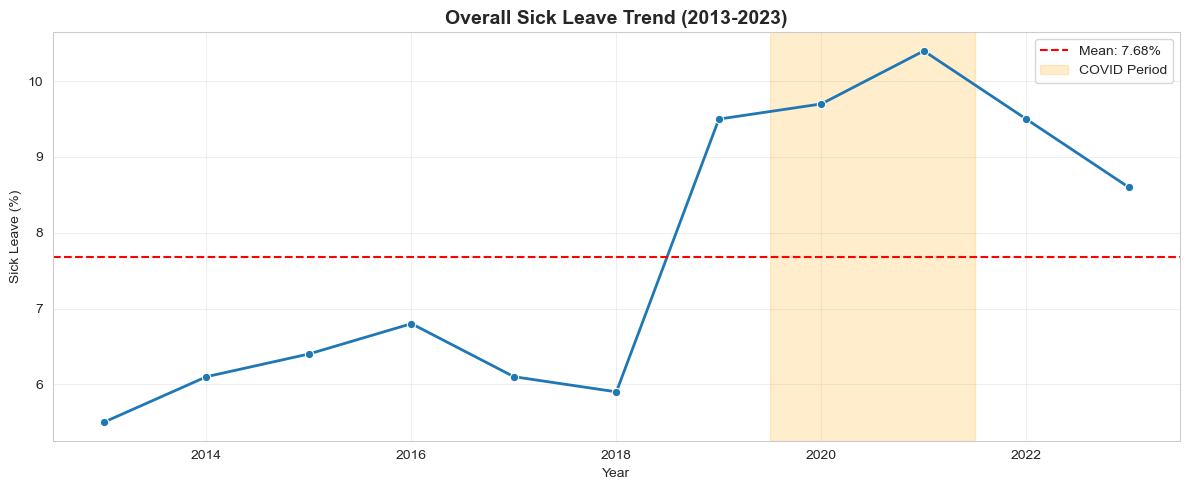

👀 What do you see?
   • Pre-COVID (2013-2019): Stable around 6%
   • COVID spike (2020-2021): Jump to 9%
   • Recovery (2022-2023): Declining back towards the pre-COVID average

💡 Key insight: The spike in 2020-2021 is clearly an outlier event that pulls the overall mean upwards.


In [9]:
# Create the final, clean version for analysis
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=df_all, 
    x='year', 
    y='sick_leave_percent', 
    marker='o',
    linewidth=2,
    errorbar=None  # No confidence interval for clean display
)

plt.title('Overall Sick Leave Trend (2013-2023)', fontsize=14, fontweight='bold')
plt.ylabel('Sick Leave (%)')
plt.xlabel('Year')

# Add a horizontal line for the mean
plt.axhline(mean_sl, color='red', linestyle='--', label=f'Mean: {mean_sl:.2f}%')

# Add a shaded region for the COVID-19 pandemic years
plt.axvspan(2019.5, 2021.5, color='orange', alpha=0.2, label='COVID Period')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("👀 What do you see?")
print("   • Pre-COVID (2013-2019): Stable around 6%")
print("   • COVID spike (2020-2021): Jump to 9%")
print("   • Recovery (2022-2023): Declining back towards the pre-COVID average")
print("\n💡 Key insight: The spike in 2020-2021 is clearly an outlier event that pulls the overall mean upwards.")

#### Business Interpretation

The time series plot makes the story clear:
-   **Stable Baseline:** Before 2020, sick leave was relatively stable, hovering around 6-7%.
-   **External Shock:** The COVID-19 pandemic caused a dramatic spike in 2020 and 2021, pushing sick leave to over 9%. This is a classic **outlier** event.
-   **Recovery:** Since 2022, the rate has been decreasing, suggesting a return to the pre-pandemic norm.

This visual evidence confirms why the mean was higher than the median. The mean is influenced by the high values during the COVID period, while the median was more resistant to this temporary shock.

### Visualization: Distribution and Outliers

**Box plots** are ideal for showing the distribution of data and identifying outliers. Let's create a box plot for the sick leave data.

#### Code Breakdown: Creating a Box Plot

The next cell uses `seaborn` to create a box plot. Here's what it does:

-   **`plt.figure(figsize=(8, 6))`**: Sets the size of the figure.

-   **`sns.boxplot(...)`**: This is the `seaborn` function to draw a box plot.
    -   `y=df_all['sick_leave_percent']`: Specifies the data for the y-axis.
    -   `color='lightblue'`: Sets the color of the box.

-   **`plt.axhline(...)`**: As before, we use this to draw a horizontal line for the mean sick leave.

-   **`plt.title(...)`, `plt.ylabel(...)`**: Set the title and y-axis label.

-   **`plt.legend()`**: Displays the legend.

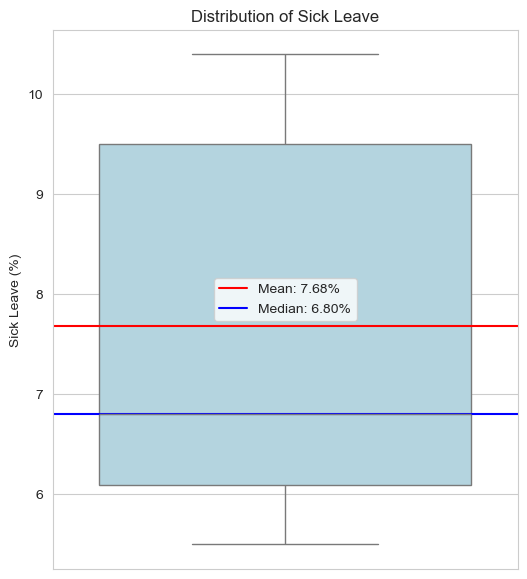

📦 Box Plot Guide:
   Box = Middle 50% of data
   Line in box = Median
   Whiskers = Normal range
   Dots outside = Outliers


In [10]:
# Box Plot: Shows distribution and outliers
plt.figure(figsize=(6, 7))
sns.boxplot(y=df_all['sick_leave_percent'], color='lightblue')
plt.axhline(mean_sl, color='red', label=f'Mean: {mean_sl:.2f}%')
plt.axhline(median_sl, color='blue', label=f'Median: {median_sl:.2f}%')
plt.title('Distribution of Sick Leave')
plt.ylabel('Sick Leave (%)')
plt.legend()
plt.show()

print("📦 Box Plot Guide:")
print("   Box = Middle 50% of data")
print("   Line in box = Median")
print("   Whiskers = Normal range")
print("   Dots outside = Outliers")

#### Statistical Interpretation

The box plot provides a compact summary of the distribution and confirms our findings:
-   **The Box**: The main box shows that 50% of the years had sick leave between roughly 6.3% and 8.5% (the Interquartile Range or IQR).
-   **The Median Line**: The line inside the box is the median (6.8%), which is closer to the bottom of the box, indicating the data is skewed upwards.
-   **The Whiskers**: These show the range of the data, excluding outliers.
-   **The Outliers**: The dots above the top whisker represent the years with unusually high sick leave (the COVID years). `seaborn`'s boxplot automatically identifies these points as outliers, confirming our analysis.

### 🎯 Task 1.4: Trend Analysis (A Step-by-Step Exploration)

**Question:** "Are sick leave rates improving or worsening for key groups?"

To answer this, we need to plot trends over time. However, our dataset contains multiple age groups. Let's explore how to handle this complexity in steps. We will focus on three key professions:
- `C1 Läkare` (Doctors)
- `A1 Sjuksköterskor` (Nurses)
- `B1 Undersköterskor m.fl.` (Assistant Nurses)

🔍 Step 1: Learning to plot trends step by step
Starting with: C1 Läkare in age group: 30- 39 år
Filtered data shape: (11, 5)
Years available: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
✅ Successfully plotted 11 data points for C1 Läkare


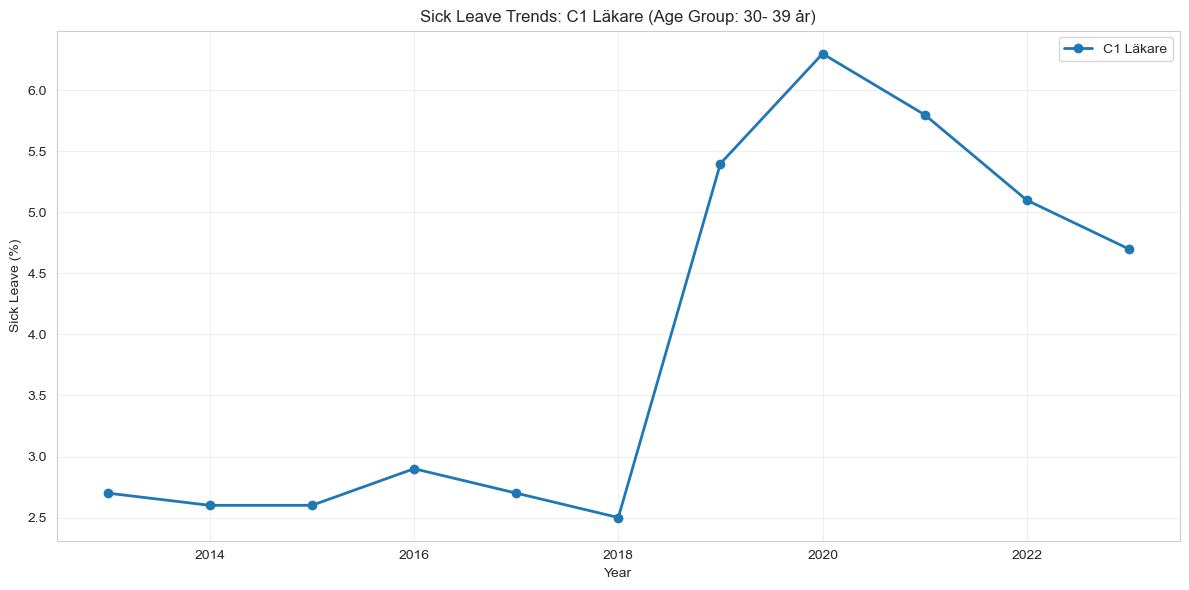


💡 What you should see:
   • A single line showing the trend for doctors aged 30-39
   • Clear data points for each year
   • COVID spike visible around 2020-2021

📊 Quick stats for C1 Läkare:
   Mean sick leave: 3.9%
   Lowest year: 2.5% in 2018
   Highest year: 6.3% in 2020


In [11]:
if 'df_prof_raw' not in globals():
    df_prof_raw = df_sick_leave_raw[df_sick_leave_raw['group'] != 'Samtliga yrkesgrupper'].copy()

print("🔍 Step 1: Learning to plot trends step by step")

# First, let's start with just ONE professional group to understand the process
first_group = 'C1 Läkare'  # We'll start with doctors
target_age = '30- 39 år'   # Remember the space after the dash!

print(f"Starting with: {first_group} in age group: {target_age}")

# Filter for just this one group, one age group, and both genders
df_single = df_prof_raw[
    (df_prof_raw['group'] == first_group) &
    (df_prof_raw['gender'] == 'Both') &
    (df_prof_raw['age_group'] == target_age)
]

print(f"Filtered data shape: {df_single.shape}")
if len(df_single) > 0:
    years = [int(y) for y in sorted(df_single['year'].unique())]
    print(f"Years available: {years}")

# Create the basic plot with just one group
plt.figure(figsize=(12, 6))

# Plot the single group
if len(df_single) > 0:
    data = df_single.sort_values('year')
    plt.plot(data['year'], data['sick_leave_percent'], 
             marker='o', label=first_group, linewidth=2, markersize=6)
    print(f"✅ Successfully plotted {len(data)} data points for {first_group}")
else:
    print(f"❌ No data found for {first_group}")

plt.title(f'Sick Leave Trends: {first_group} (Age Group: {target_age})')
plt.ylabel('Sick Leave (%)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 What you should see:")
print("   • A single line showing the trend for doctors aged 30-39")
print("   • Clear data points for each year")
print("   • COVID spike visible around 2020-2021")

if len(df_single) > 0:
    print(f"\n📊 Quick stats for {first_group}:")
    print(f"   Mean sick leave: {df_single['sick_leave_percent'].mean():.1f}%")
    min_year = df_single.loc[df_single['sick_leave_percent'].idxmin(), 'year']
    max_year = df_single.loc[df_single['sick_leave_percent'].idxmax(), 'year']
    print(f"   Lowest year: {df_single['sick_leave_percent'].min():.1f}% in {min_year}")
    print(f"   Highest year: {df_single['sick_leave_percent'].max():.1f}% in {max_year}")

#### Now It's Your Turn: Add the Other Two Groups

You've seen how to plot one professional group. Now modify the code above to add the other two key groups:
- `'A1 Sjuksköterskor'` (Nurses)  
- `'B1 Undersköterskor m.fl.'` (Assistant Nurses)

**Your task:** Copy the cell above, then modify it to show all three groups on the same plot.

**Hint:** You'll need to:
1. Create a list of all three groups: `key_groups = ['C1 Läkare', 'A1 Sjuksköterskor', 'B1 Undersköterskor m.fl.']`
2. Filter for all three groups (use `.isin(key_groups)` instead of `== first_group`)
3. Use a `for` loop to plot each group separately

🔍 Step 2: All three professional groups (YOUR TURN)
Analyzing all groups: ['C1 Läkare', 'A1 Sjuksköterskor', 'B1 Undersköterskor m.fl.']
Age group: 30- 39 år
Filtered data shape: (33, 5)
📈 Plotted 11 points for C1 Läkare
📈 Plotted 11 points for A1 Sjuksköterskor
📈 Plotted 11 points for B1 Undersköterskor m.fl.

💡 What to notice in the complete plot:
   • Three distinct trend lines, one for each profession
   • Different baseline rates between professions
   • COVID spike visible across all groups (but different magnitudes)
   • Recovery patterns post-2021 may vary by group

📊 Quick comparison (Age 30- 39 år):
   C1 Läkare: 3.9% average
   A1 Sjuksköterskor: 6.6% average
   B1 Undersköterskor m.fl.: 10.4% average


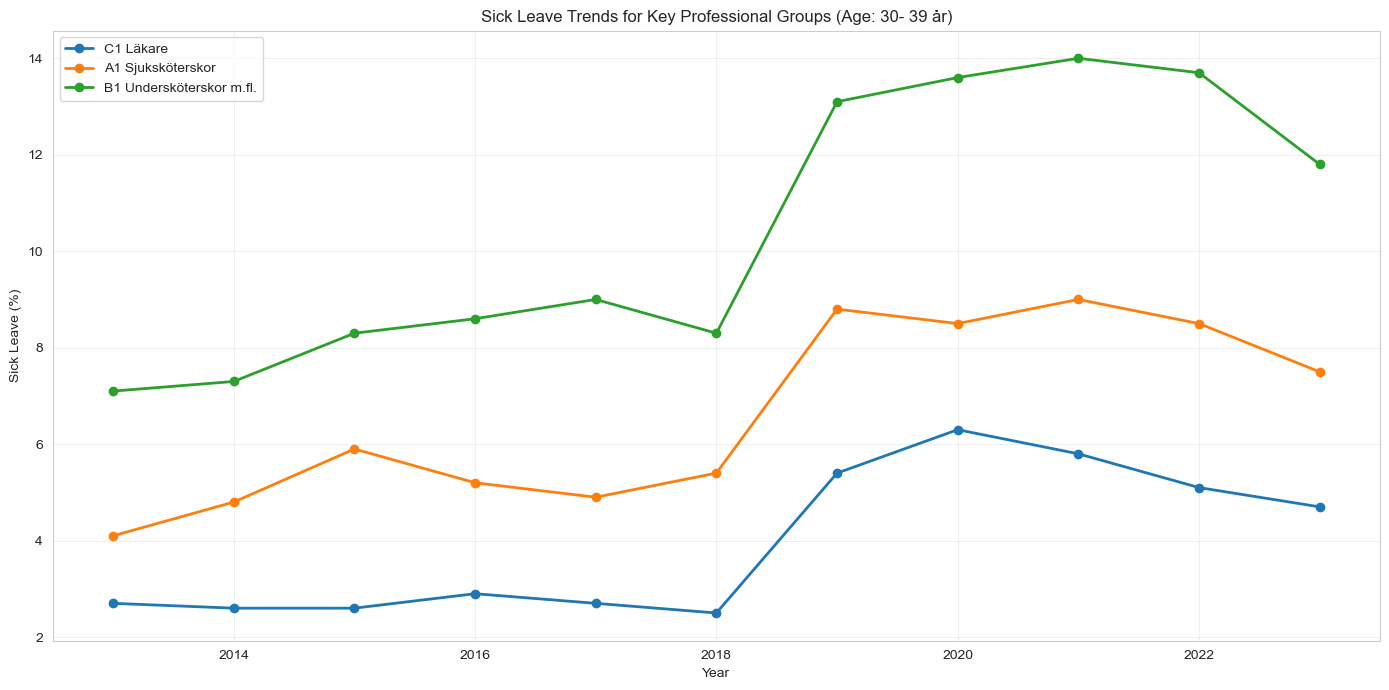


🎯 Success Check:
   ✅ You should see THREE lines on your plot
   ✅ Each line should have a different color and be labeled
   ✅ The legend should show all three professional groups
   ✅ You should see clear differences in sick leave rates between the groups


In [12]:
if 'df_prof_raw' not in globals():
    df_prof_raw = df_sick_leave_raw[df_sick_leave_raw['group'] != 'Samtliga yrkesgrupper'].copy()

print("🔍 Step 2: All three professional groups (YOUR TURN)")

# TODO: Create a list of all three key professional groups
key_groups = [
    'C1 Läkare',                    # Doctors
    'A1 Sjuksköterskor',           # Nurses  
    'B1 Undersköterskor m.fl.'     # Assistant Nurses
]

target_age = '30- 39 år'

print(f"Analyzing all groups: {key_groups}")
print(f"Age group: {target_age}")

# TODO: Filter for ALL three groups (not just one)
df_all_three = df_prof_raw[
    (df_prof_raw['group'].isin(key_groups)) &  # Note: .isin() instead of ==
    (df_prof_raw['gender'] == 'Both') &
    (df_prof_raw['age_group'] == target_age)
]

print(f"Filtered data shape: {df_all_three.shape}")

# Create the plot
plt.figure(figsize=(14, 7))
plot_created = False

# TODO: Loop through each group and plot it
for group in key_groups:
    # Filter data for this specific group
    data = df_all_three[df_all_three['group'] == group].sort_values('year')
    
    if len(data) > 0:
        # Plot this group's data
        plt.plot(data['year'], data['sick_leave_percent'], 
                marker='o', label=group, linewidth=2, markersize=6)
        print(f"📈 Plotted {len(data)} points for {group}")
        plot_created = True
    else:
        print(f"❌ No data found for {group}")

# Finalize the plot
if plot_created:
    plt.title(f'Sick Leave Trends for Key Professional Groups (Age: {target_age})')
    plt.ylabel('Sick Leave (%)')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    print("\n💡 What to notice in the complete plot:")
    print("   • Three distinct trend lines, one for each profession")
    print("   • Different baseline rates between professions")
    print("   • COVID spike visible across all groups (but different magnitudes)")
    print("   • Recovery patterns post-2021 may vary by group")
    
    # Quick comparison
    print(f"\n📊 Quick comparison (Age {target_age}):")
    for group in key_groups:
        group_data = df_all_three[df_all_three['group'] == group]
        if len(group_data) > 0:
            mean_rate = group_data['sick_leave_percent'].mean()
            print(f"   {group}: {mean_rate:.1f}% average")
else:
    plt.text(0.5, 0.5, 'No data found\nCheck group names and age group format', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=14,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    plt.title('Data Not Found')

plt.show()

print(f"\n🎯 Success Check:")
print("   ✅ You should see THREE lines on your plot")
print("   ✅ Each line should have a different color and be labeled")
print("   ✅ The legend should show all three professional groups")
print("   ✅ You should see clear differences in sick leave rates between the groups")

🔍 Step 3: Overall sick leave trends for key professional groups
Filtered data shape: (33, 5)
📈 Plotted 11 points for C1 Läkare
📈 Plotted 11 points for A1 Sjuksköterskor
📈 Plotted 11 points for B1 Undersköterskor m.fl.

📊 Business Trend Analysis:
Group                          2013-2019 Avg   2022-2023 Avg   Trend
------------------------------------------------------------
C1 Läkare                      3.6             5.0             ❌ Worsening
A1 Sjuksköterskor              6.9             9.6             ❌ Worsening
B1 Undersköterskor m.fl.       9.6             13.2            ❌ Worsening

💼 Strategic Insights:
   • Which groups show the most reliable patterns?
   • Are post-COVID rates returning to pre-COVID levels?
   • Which professions might need additional wellness support?


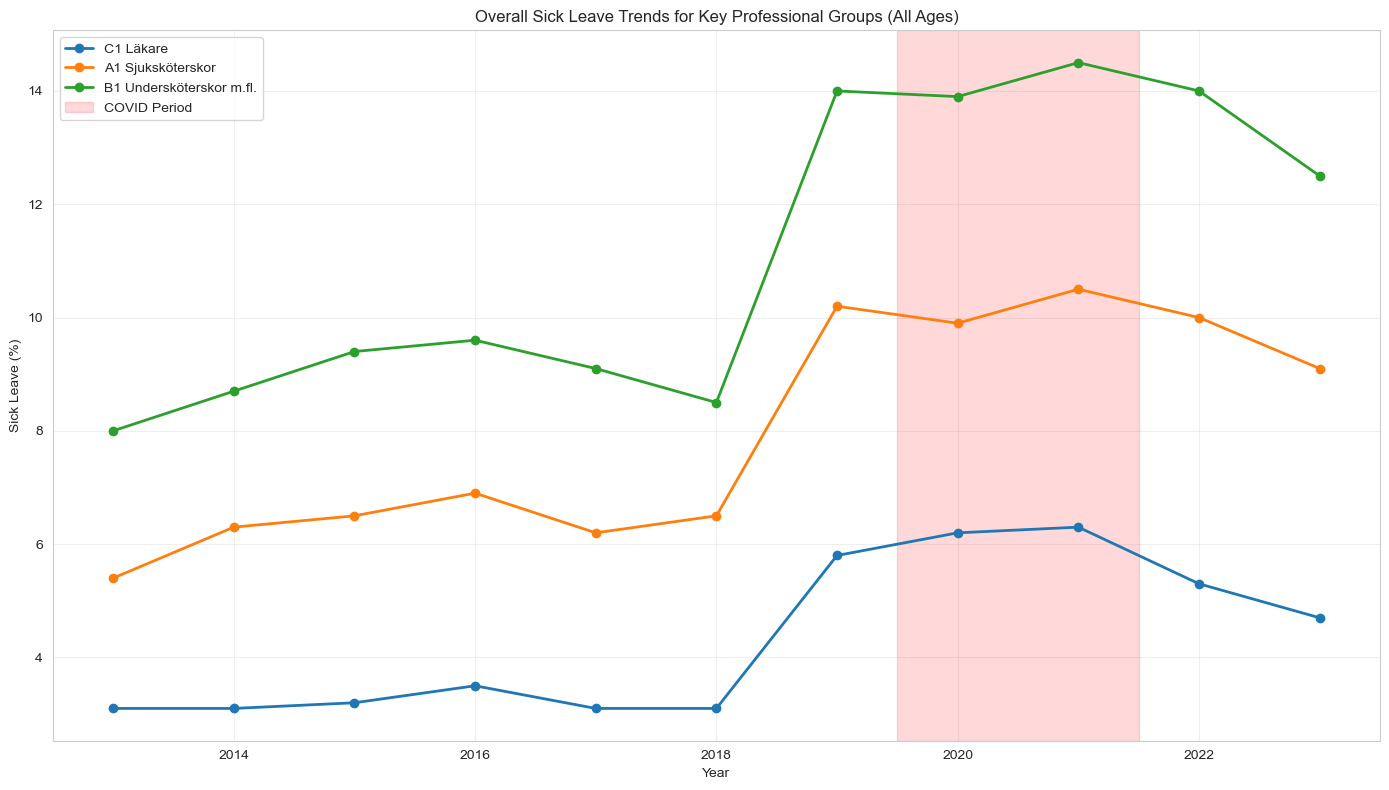

In [ ]:
if 'df_prof_raw' not in globals():
    df_prof_raw = df_sick_leave_raw[df_sick_leave_raw['group'] != 'Samtliga yrkesgrupper'].copy()

# STEP 3: FINAL ANALYSIS - All Ages Trends for Business Decisions
# ===============================================================

print("🔍 Step 3: Overall sick leave trends for key professional groups")

# Use 'Alla åldrar' for comprehensive business analysis
key_groups = ['C1 Läkare', 'A1 Sjuksköterskor', 'B1 Undersköterskor m.fl.']

df_all_ages = df_prof_raw[
    (df_prof_raw['group'].isin(key_groups)) &
    (df_prof_raw['gender'] == 'Both') &
    (df_prof_raw['age_group'] == 'Alla åldrar')  # All ages for business decisions
]

print(f"Filtered data shape: {df_all_ages.shape}")

# Create the final business trends plot
plt.figure(figsize=(14, 8))
plot_created = False

for group in key_groups:
    data = df_all_ages[df_all_ages['group'] == group].sort_values('year')
    if len(data) > 0:
        plt.plot(data['year'], data['sick_leave_percent'], 
                marker='o', label=group, linewidth=2, markersize=6)
        print(f"📈 Plotted {len(data)} points for {group}")
        plot_created = True

if plot_created:
    # Add COVID period highlighting
    plt.axvspan(2019.5, 2021.5, color='red', alpha=0.15, label='COVID Period')
    
    plt.title('Overall Sick Leave Trends for Key Professional Groups (All Ages)')
    plt.ylabel('Sick Leave (%)')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Calculate trend statistics
    print("\n📊 Business Trend Analysis:")
    print("=" * 60)
    print(f"{'Group':<30} {'2013-2019 Avg':<15} {'2022-2023 Avg':<15} {'Trend'}")
    print("-" * 60)
    
    for group in key_groups:
        data = df_all_ages[df_all_ages['group'] == group]
        if len(data) > 0:
            pre_covid = data[data['year'] <= 2019]['sick_leave_percent']
            post_covid = data[data['year'] >= 2022]['sick_leave_percent']
            
            if len(pre_covid) > 0 and len(post_covid) > 0:
                pre_avg = pre_covid.mean()
                post_avg = post_covid.mean()
                
                if post_avg < pre_avg:
                    trend = "✅ Improving"
                elif post_avg > pre_avg:
                    trend = "❌ Worsening"
                else:
                    trend = "➡️ Stable"
                    
                print(f"{group:<30} {pre_avg:<15.1f} {post_avg:<15.1f} {trend}")
    
    print("\n💼 Strategic Insights:")
    print("   • Which groups show the most reliable patterns?")
    print("   • Are post-COVID rates returning to pre-COVID levels?")
    print("   • Which professions might need additional wellness support?")
    
else:
    plt.text(0.5, 0.5, 'No data found for business analysis', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=16)
    plt.title('No Data Available for Business Analysis')

plt.show()

**✏️ Your 5-Year Recommendation:**

**Overall trend:** [Improving/Stable/Worsening]

**Budget planning:**
- Years 1-2: _____% (because...)
- Years 3-5: _____% (because...)

**Based on trends, should you revise your Task 1.1 budget?** [Yes/No, why?]

---
## 🎯 Part 4: Wrap-Up (10 min)

### What You Learned

**🐍 Python:**
- Importing libraries, loading Excel files
- Filtering data, calculating statistics
- Creating charts, and understanding how filtering choices affect them

**📊 Statistics:**
- Mean vs median, when to use each
- Standard deviation, coefficient of variation
- Outlier detection, confidence intervals

**💼 Business:**
- Evidence-based budgeting
- Risk assessment through variability
- Multi-factor decision making

### Key Insights

**1. Context matters** - Same data, different interpretations depending on stakeholder
**2. Outliers require judgment** - Include COVID or exclude? Depends on your assumptions
**3. No perfect answer** - Good decisions are justified, not just "correct"
**4. Filtering is analysis** - How you filter your data (e.g., by age group) fundamentally changes the story your visualization tells.

### Next Week: Workshop 2

You'll add **salary data** → analyze **cost vs reliability trade-offs** → face **stakeholder conflicts**

**Prepare:** Review your Task 1.1 budget recommendation - you'll revisit it!

### Reflection

**Most challenging aspect:** [Your thoughts]

**Biggest insight:** [Your thoughts]

**Confidence in recommendations (1-10):** ___ because [your reasoning]

## 📋 Deliverables

**Submit (if required):**
1. Completed notebook with all tasks
2. Your recommendations for all 4 tasks
3. Reflection paragraph

**Self-Check:**
- [ ] I can calculate mean, median, SD
- [ ] I can create time series and box plots
- [ ] I can identify outliers
- [ ] I can justify decisions with data
- [ ] I understand method limitations

---
## 🎁 BONUS: Complete Dataset Investigation Guide
### *"How to Explore Any New Dataset Like a Pro"*

**This section is optional but highly recommended!** It teaches you systematic data exploration techniques you can use on any Excel/CSV file you encounter in your career. These are the skills that separate experienced analysts from beginners.

---

### 📋 The Data Detective's Checklist

When you get a new dataset, follow this systematic approach:

1. **📊 Initial Inspection** - What do I have?
2. **🔍 Data Quality Assessment** - Can I trust it?
3. **📈 Exploratory Data Analysis** - What patterns exist?
4. **🧹 Data Profiling** - What needs fixing?
5. **🎯 Hypothesis Generation** - What questions can I ask?

Let's walk through each step with practical code examples you can adapt to any dataset.

### 📊 Step 1: Initial Dataset Inspection

**Goal:** Get your bearings quickly - understand the basic structure and contents.

#### The "First 5 Minutes" Routine

Every time you load a new dataset, run this diagnostic sequence:

In [13]:
# STEP 1: INITIAL DATASET INSPECTION
# ====================================

# Always start with these basic checks
print("🔍 DATASET OVERVIEW")
print("=" * 50)

# Basic info
print(f"📏 Shape: {df_sick_leave_raw.shape[0]:,} rows × {df_sick_leave_raw.shape[1]} columns")
print(f"💾 Memory usage: {df_sick_leave_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📅 Date range: {df_sick_leave_raw['year'].min()} - {df_sick_leave_raw['year'].max()}")

# Column overview
print(f"\n📋 COLUMNS ({len(df_sick_leave_raw.columns)}):")
for i, col in enumerate(df_sick_leave_raw.columns, 1):
    dtype = df_sick_leave_raw[col].dtype
    null_count = df_sick_leave_raw[col].isnull().sum()
    unique_count = df_sick_leave_raw[col].nunique()
    print(f"  {i:2d}. {col:<25} │ {str(dtype):<12} │ {null_count:4d} nulls │ {unique_count:4d} unique")

print(f"\n👀 FIRST FEW ROWS:")
display(df_sick_leave_raw.head(3))

print(f"\n👀 LAST FEW ROWS:")
display(df_sick_leave_raw.tail(3))

print(f"\n📊 DATA TYPES SUMMARY:")
print(df_sick_leave_raw.dtypes.value_counts())

🔍 DATASET OVERVIEW
📏 Shape: 4,730 rows × 5 columns
💾 Memory usage: 1.19 MB
📅 Date range: 2013 - 2023

📋 COLUMNS (5):
   1. age_group                 │ object       │    0 nulls │    6 unique
   2. group                     │ object       │    0 nulls │   24 unique
   3. year                      │ int64        │    0 nulls │   11 unique
   4. gender                    │ object       │    0 nulls │    3 unique
   5. sick_leave_percent        │ float64      │    0 nulls │  197 unique

👀 FIRST FEW ROWS:


,age_group,group,year,gender,sick_leave_percent
0,Alla åldrar,Samtliga yrkesgrupper,2013,Women,6.0
1,Alla åldrar,Samtliga yrkesgrupper,2013,Men,3.4
2,Alla åldrar,Samtliga yrkesgrupper,2013,Both,5.5



👀 LAST FEW ROWS:


,age_group,group,year,gender,sick_leave_percent
4727,60- år,L2 Handläggar och administratörsarbete,2023,Women,7.2
4728,60- år,L2 Handläggar och administratörsarbete,2023,Men,3.9
4729,60- år,L2 Handläggar och administratörsarbete,2023,Both,6.4



📊 DATA TYPES SUMMARY:
object     3
int64      1
float64    1
Name: count, dtype: int64


### 🔍 Step 2: Data Quality Assessment

**Goal:** Evaluate the dataset's reliability and identify potential issues.

#### Key Questions to Answer
1. Are there missing or null values?
2. Are there duplicate rows?
3. Do the columns have appropriate data types?
4. Are there any obvious outliers or errors in the data?

#### Diagnostic Checks
Run these checks to assess data quality:

🔍 DATA QUALITY ASSESSMENT
✅ No missing values in the dataset.
📋 Duplicate rows: 0

🔍 Data types and potential issues:
  ⚠️ Column 'group' contains suspicious characters (;,).

📊 Numeric columns for outlier detection:


,year,sick_leave_percent
count,4730.000000,4730.000000
mean,2017.978436,6.144419
std,3.153901,4.051275
min,2013.000000,0.000000
25%,2015.000000,3.400000
50%,2018.000000,6.000000
75%,2021.000000,8.600000
max,2023.000000,75.000000


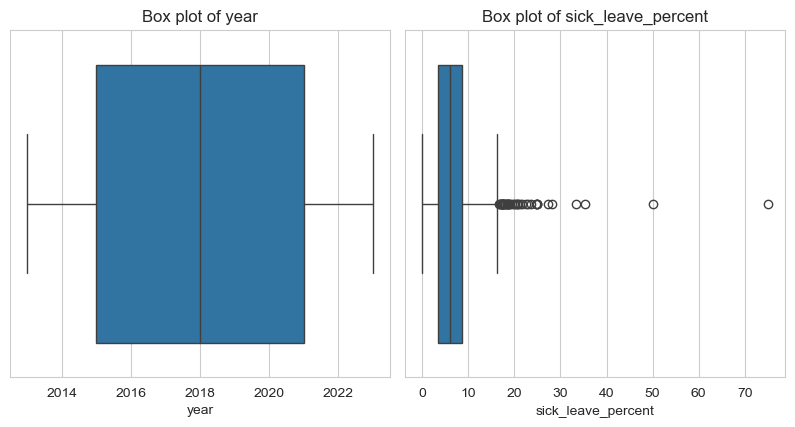

In [14]:
# STEP 2: DATA QUALITY ASSESSMENT
# ==================================

print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 50)

# 1. Missing values
missing_summary = df_sick_leave_raw.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Count']
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

if len(missing_summary) > 0:
    print(f"🚨 Missing values found in {len(missing_summary)} columns:")
    display(missing_summary)
else:
    print("✅ No missing values in the dataset.")

# 2. Duplicate rows
duplicate_count = df_sick_leave_raw.duplicated().sum()
print(f"📋 Duplicate rows: {duplicate_count}")

# 3. Data types
print("\n🔍 Data types and potential issues:")
for column in df_sick_leave_raw.select_dtypes(include=['object']).columns:
    if df_sick_leave_raw[column].str.contains(';|,', na=False).any():
        print(f"  ⚠️ Column '{column}' contains suspicious characters (;,).")
        
# 4. Outliers
numeric_cols = df_sick_leave_raw.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\n📊 Numeric columns for outlier detection:")
display(df_sick_leave_raw[numeric_cols].describe())

# Visual check for outliers in numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_sick_leave_raw[column])
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()

### 🔍 Step 3: Exploratory Data Analysis (EDA)

**Goal:** Uncover patterns, trends, and relationships in the data.

#### Key Analyses to Perform
1. Trend analysis over the years
2. Comparison between different age groups and professions
3. Impact of COVID-19 on sick leave rates

#### Visualizations to Create
- Time series plots
- Bar charts for categorical comparisons
- Box plots for distribution and outlier detection

📊 EXPLORATORY DATA ANALYSIS (EDA)


C:\Users\gimb\AppData\Local\Temp\ipykernel_6972\3874702912.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sick_leave_raw, x='year', y='sick_leave_percent', ci=None)


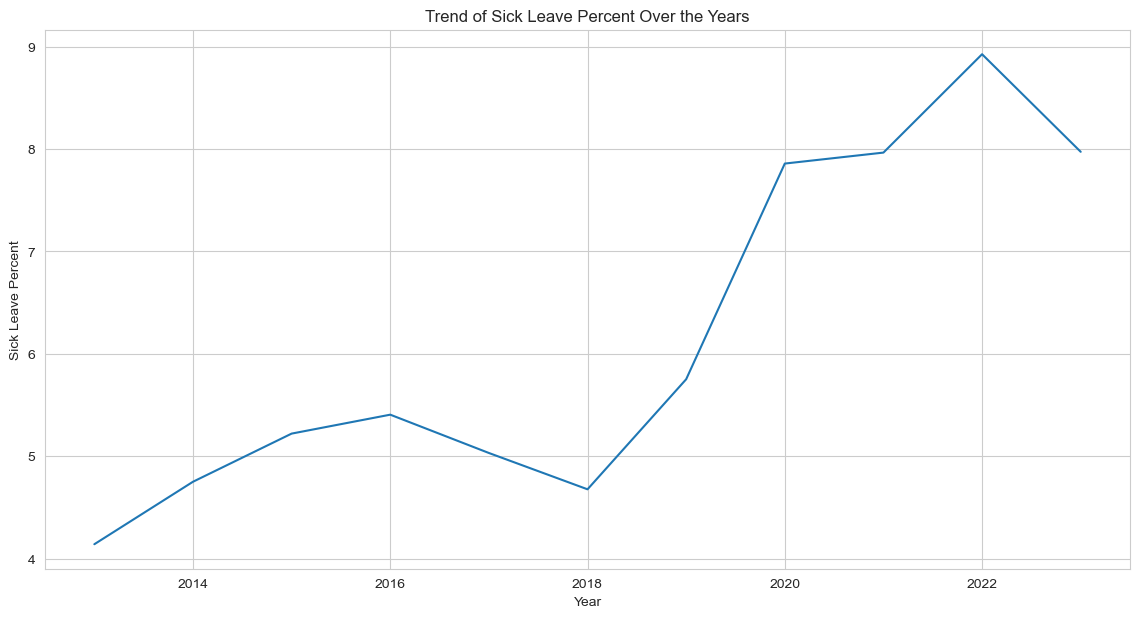

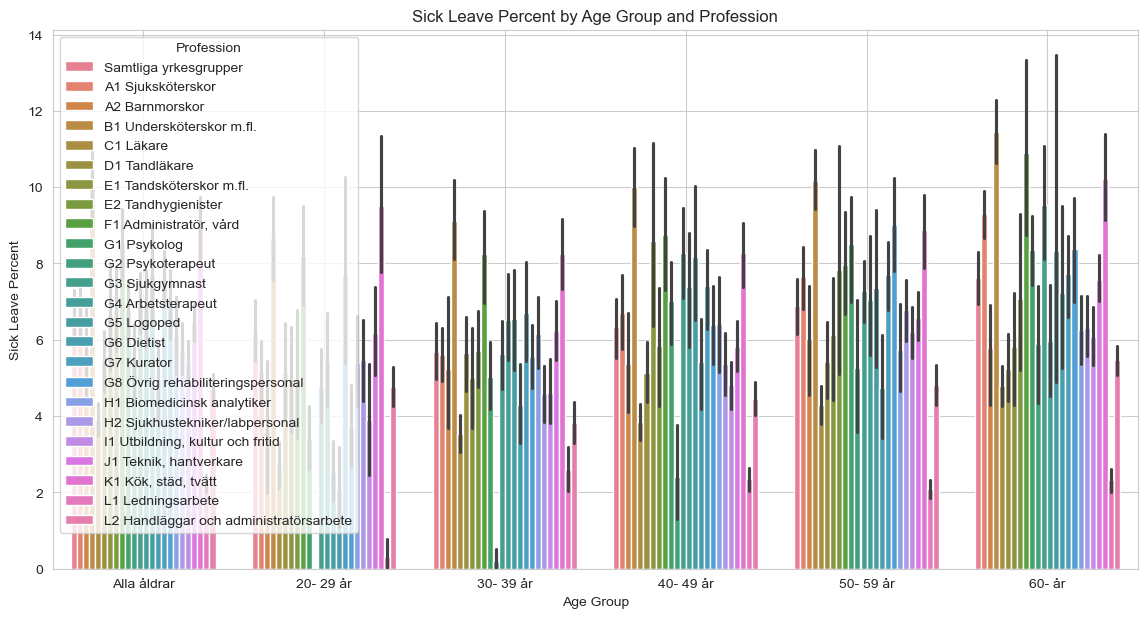

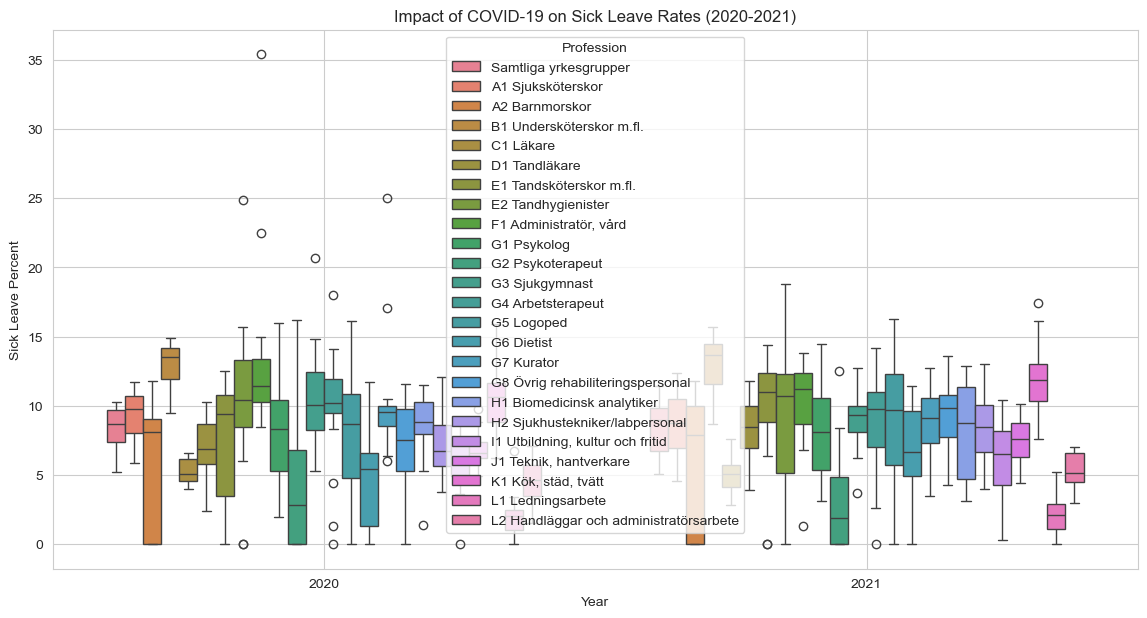

In [15]:
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# =========================================

print("📊 EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 50)

# Trend analysis over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sick_leave_raw, x='year', y='sick_leave_percent', ci=None)
plt.title("Trend of Sick Leave Percent Over the Years")
plt.ylabel("Sick Leave Percent")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Comparison between different age groups and professions
plt.figure(figsize=(14, 7))
sns.barplot(data=df_sick_leave_raw, x='age_group', y='sick_leave_percent', hue='group')
plt.title("Sick Leave Percent by Age Group and Profession")
plt.ylabel("Sick Leave Percent")
plt.xlabel("Age Group")
plt.legend(title="Profession")
plt.grid(True)
plt.show()

# Impact of COVID-19 on sick leave rates
covid_impact = df_sick_leave_raw[df_sick_leave_raw['year'].isin([2020, 2021])]
plt.figure(figsize=(14, 7))
sns.boxplot(data=covid_impact, x='year', y='sick_leave_percent', hue='group')
plt.title("Impact of COVID-19 on Sick Leave Rates (2020-2021)")
plt.ylabel("Sick Leave Percent")
plt.xlabel("Year")
plt.legend(title="Profession")
plt.grid(True)
plt.show()

📊 DATA PROFILING


,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound
year,4730.0,2017.978436,3.153901,2013.0,2015.0,2018.0,2021.0,2023.0,6.0,2006.0,2030.0
sick_leave_percent,4730.0,6.144419,4.051275,0.0,3.4,6.0,8.6,75.0,5.2,-4.4,16.4


,count,unique,top,freq
age_group,4730,6,Alla åldrar,791
group,4730,24,Samtliga yrkesgrupper,198
gender,4730,3,Women,1583



🔗 CORRELATIONS BETWEEN NUMERICAL VARIABLES:
Numeric columns found: ['year', 'sick_leave_percent']


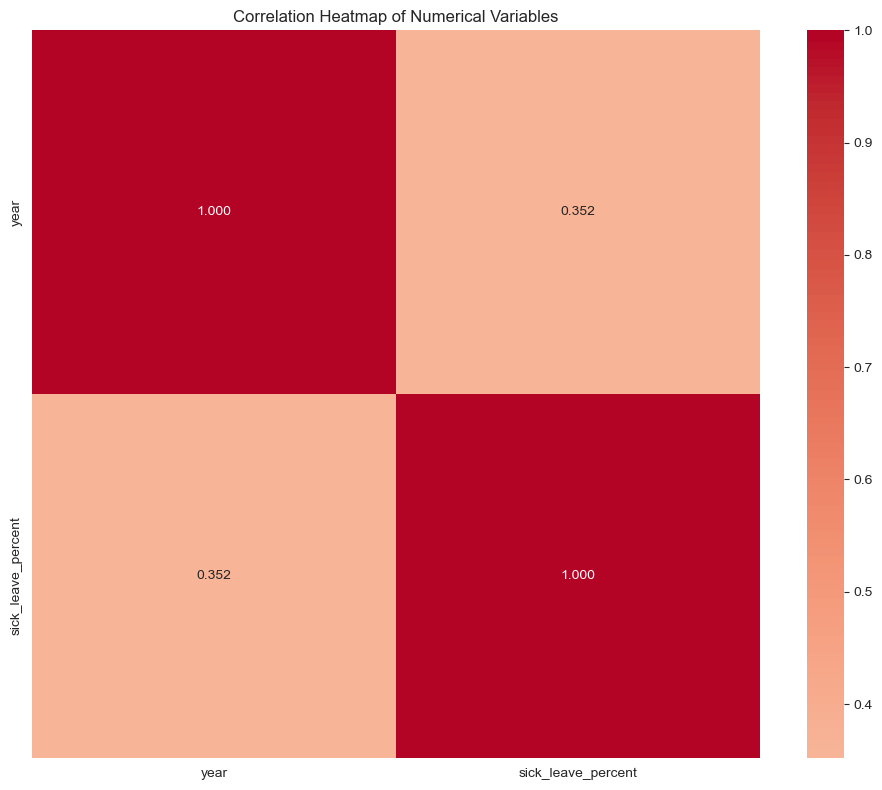


📈 Key correlations:
   year ↔ sick_leave_percent: 0.352


In [199]:
# STEP 4: DATA PROFILING
# =========================

print("📊 DATA PROFILING")
print("=" * 50)

# Distribution of numerical variables
numeric_summary = df_sick_leave_raw.describe().T
numeric_summary['IQR'] = numeric_summary['75%'] - numeric_summary['25%']
numeric_summary['Lower Bound'] = numeric_summary['25%'] - 1.5 * numeric_summary['IQR']
numeric_summary['Upper Bound'] = numeric_summary['75%'] + 1.5 * numeric_summary['IQR']
display(numeric_summary)

# Frequency of categorical variables
categorical_summary = df_sick_leave_raw.describe(include=['object']).T
display(categorical_summary)

# Relationships between variables (FIXED: Select only numeric columns)
print("\n🔗 CORRELATIONS BETWEEN NUMERICAL VARIABLES:")
numeric_cols = df_sick_leave_raw.select_dtypes(include=[np.number]).columns
print(f"Numeric columns found: {list(numeric_cols)}")

if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_sick_leave_raw[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title("Correlation Heatmap of Numerical Variables")
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Key correlations:")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            print(f"   {col1} ↔ {col2}: {corr_val:.3f}")
else:
    print("⚠️ Only one numeric column found - cannot compute correlations")
    print("This is normal for this dataset (only year and sick_leave_percent are numeric)")

In [16]:
# STEP 5: HYPOTHESIS GENERATION
# ================================

print("🧠 HYPOTHESIS GENERATION")
print("=" * 50)

# Example hypotheses based on exploration
hypotheses = [
    "Sick leave rates are higher during certain years due to external events (e.g., COVID-19).",
    "There are significant differences in sick leave rates between professions.",
    "Age groups show different trends in sick leave over the years."
]

for i, hypothesis in enumerate(hypotheses, 1):
    print(f"{i}. {hypothesis}")

print("\n➡️ Next steps:")
print("  • Validate or invalidate these hypotheses with further analysis.")
print("  • Consider external factors or data that could impact these hypotheses.")

🧠 HYPOTHESIS GENERATION
1. Sick leave rates are higher during certain years due to external events (e.g., COVID-19).
2. There are significant differences in sick leave rates between professions.
3. Age groups show different trends in sick leave over the years.

➡️ Next steps:
  • Validate or invalidate these hypotheses with further analysis.
  • Consider external factors or data that could impact these hypotheses.
